In [1]:
from LOTUS_regression.regression import mzm_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator



In [7]:
''' Code to apply MLR, ILT or new predictors to the Uccle data'''

# boolean to run the code w.r.t. to reltropop of the absolute altitude
reltropop = False


def plotmlr_perkm(pX, pY, pRegOutput, pltitle, plname):
    plt.close('all')

    fig, ax = plt.subplots()
    plt.title(pltitle)
    plt.xlabel('Years')
    # plt.ylabel('Residuals')
    plt.ylabel('PO3 (hPa)')

    # plt.plot(pX, pY, label='Residuals', color='blue')
    plt.plot(pX, pY, label='Data', color='blue')

    plt.plot(pX, pRegOutput, label='Model', color='orange')

    ax.legend(loc='upper right', frameon=True, fontsize='small')

    # plt.savefig('/Volumes/HD3/KMI/MLR_Uccle/Plots/pwlt_deseas/' + plname + '.pdf')
    # plt.savefig('/Volumes/HD3/KMI/MLR_Uccle/Plots/pwlt_deseas/' + plname + '.eps')
    plt.savefig('/home/poyraden/MLR_Uccle/Plots/Uccle_50years/DataModel/' + plname + '.pdf')
    plt.savefig('/home/poyraden/MLR_Uccle/Plots/Uccle_50years/DataModel/' + plname + '.eps')
    plt.close()
    plt.close()


######################################################################################################################




In [8]:
# part for using extended predictors
pre_name = 'ilt'
plname = 'Trend_' + pre_name
tag = ''

predictors = pd.read_csv('/home/poyraden/MLR_Uccle/Files/Extended_ilt.csv')

# try new predictors
# predictors= pd.read_csv('/home/poyraden/MLR_Uccle/Files/NewPredictors_ilt.csv')

setp = set(predictors['Unnamed: 0'].tolist())

predictors.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
predictors['date'] = pd.to_datetime(predictors['date'], format='%Y-%m')
predictors.set_index('date', inplace=True)

# For Brewer Mast
predictors = predictors.loc['1971-07-01':'2018-12-01']


In [38]:
uccle = pd.read_csv('/home/poyraden/MLR_Uccle/Files/TotalOzone_monthlymean.csv')



setu = set(uccle.date.tolist())

# uccle.rename(columns={'Unnamed: 0':'date'}, inplace=True)
#uccle['date'] =  dates
uccle['dateindex'] = pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
print('uccle', len(uccle), list(uccle))

uccle['monthly_mean'] = uccle['mean'] - uccle['anamoly']
uccle['rel_anamoly'] = (uccle['mean'] - uccle['monthly_mean'])/ uccle['monthly_mean']



print('predictors', len(predictors), list(predictors))

# remove uccle missing dates:

difup = setp.symmetric_difference(setu)
diup = list(difup)
# uccle = uccle.drop(diup)

# uccle['date'] = pd.to_datetime(uccle['date'], format='%Y-%m')
# uccle.set_index('date', inplace=True)


print(uccle.index)


predictors, uccle = pd.DataFrame.align(predictors, uccle, axis=0)

uY = uccle['rel_anamoly'].values
uX = predictors.values

regression_output = mzm_regression(uX, uY)
param_list = dict(zip(list(predictors), regression_output['gls_results'].params))
error_list = dict(zip(list(predictors), regression_output['gls_results'].bse))

plotmlr_perkm(uccle.dateindex,uY,regression_output['fit_values'],'test','test')

trend_pre= param_list['linear_pre']
trend_pre_err= error_list['linear_pre']
trend_post= param_list['linear_post']
trend_post_err= error_list['linear_post']

# # for per year
trend_pre=trend_pre /(10)
trend_pre_err=2 * trend_pre_err * 100
trend_post=trend_post /(10)
trend_post_err=2 * trend_post_err * 100

print(trend_pre)
print(trend_post)


uccle 567 ['Unnamed: 0', 'jdate', 'mean', 'anamoly', 'dateindex']
predictors 570 ['linear_pre', 'linear_post', 'post_const', 'pre_const', 'gap_const', 'enso', 'qboA', 'qboB', 'solar', 'AOD']
Index(['1971-07-01', '1971-08-01', '1971-09-01', '1971-10-01', '1971-11-01',
       '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
       ...
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
      dtype='object', name='date', length=567)
-0.00139265258923
0.00188317756816


In [11]:
regression_output['gls_results'].params

array([-0.01392653,  0.01883178, -0.01520039, -0.01534309, -0.01890801,
        0.00132471, -0.00340642,  0.00573543,  0.00694907, -0.01255737])

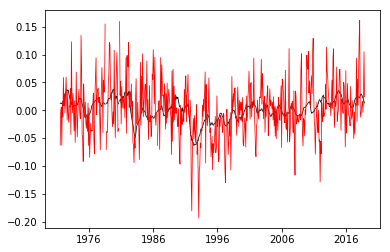

In [33]:
ty = pd.DatetimeIndex(uccle['dateindex']).year
tm = pd.DatetimeIndex(uccle['dateindex']).month
td = pd.DatetimeIndex(uccle['dateindex']).day

In [37]:
tm

Float64Index([ 7.0,  8.0,  9.0, 10.0, 11.0, 12.0,  1.0,  2.0,  3.0,  4.0,
              ...
               3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0],
             dtype='float64', name='dateindex', length=570)

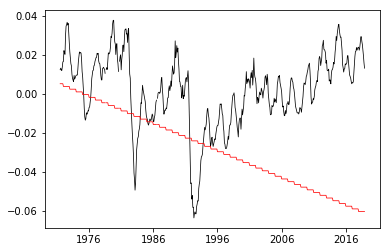

In [40]:
plt.plot(uccle.dateindex,regression_output['fit_values'],label='Model',color='black',linewidth=0.75)
plt.plot(uccle.dateindex, ty * trend_pre + 2.750 ,label='Model',color='red',linewidth=0.75)

plt.show()